## 課程目標
    
了解 MLP 在神經網路上的應用

## 範例重點

以 Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

## 資料預處理

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
# 載入手寫辨識的資料集
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [3]:
def normalize_mnist_data(x, y):
    x = x.reshape(-1, 28 * 28).astype('float32') / 255
    y = np_utils.to_categorical(y)
    return x, y

def normalize_result(x, y):
    print('x_image.shape:', x.shape)
    print('y_label.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(x_train_image, y_train_label)

Before normalization:
x_image.shape: (60000, 28, 28)
y_label.shape: (60000,)


In [5]:
print('After normalization:')
x_train_image, y_train_label = normalize_mnist_data(x_train_image, y_train_label)
x_test_image, y_test_label = normalize_mnist_data(x_test_image, y_test_label)
normalize_result(x_train_image, y_train_label)

After normalization:
x_image.shape: (60000, 784)
y_label.shape: (60000, 10)


## 建立模型

In [6]:
# 宣告採用序列模型
model = Sequential()

# 建構輸入層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 建構輸出層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=x_train_image, y=y_train_label, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.2680 - acc: 0.9235 - val_loss: 0.1529 - val_acc: 0.9551
Epoch 2/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.1076 - acc: 0.9682 - val_loss: 0.1138 - val_acc: 0.9664
Epoch 3/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.0693 - acc: 0.9787 - val_loss: 0.0865 - val_acc: 0.9740
Epoch 4/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.0480 - acc: 0.9855 - val_loss: 0.0922 - val_acc: 0.9727
Epoch 5/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.0366 - acc: 0.9888 - val_loss: 0.0809 - val_acc: 0.9763
Epoch 6/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.0271 - acc: 0.9919 - val_loss: 0.0874 - val_acc: 0.9762
Epoch 7/10
48000/48000 [==============================] - 6s 121us/step - loss: 0.0190 - acc: 0.9942 - val_loss: 0.0859 - 

In [9]:
print(train_history)
print(train_history.history)

{'val_loss': [0.15292946962515513, 0.11377028911498685, 0.08652203416715687, 0.09220366206260708, 0.08092132715616997, 0.08740537146828137, 0.08586481923454752, 0.10477497359471939, 0.08888331181888255, 0.09927873780838854], 'val_acc': [0.9550833333333333, 0.9664166666666667, 0.974, 0.9726666666666667, 0.9763333333333334, 0.97625, 0.9775, 0.97325, 0.9773333333333334, 0.97675], 'loss': [0.2680024356308083, 0.10759020264726132, 0.06932850282266736, 0.04801058113404239, 0.036589141471699504, 0.02705730552150635, 0.01903769810965362, 0.016188045993209624, 0.012101043386360592, 0.010319112501165364], 'acc': [0.9234583333333334, 0.9681875, 0.9787291666666667, 0.9855416666666666, 0.9887708333333334, 0.9918541666666667, 0.9942083333333334, 0.9952291666666667, 0.9963958333333334, 0.9968958333333333]}


## 以圖形顯示訓練過程

In [10]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

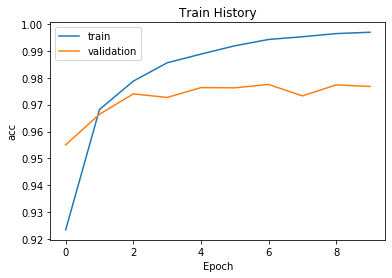

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

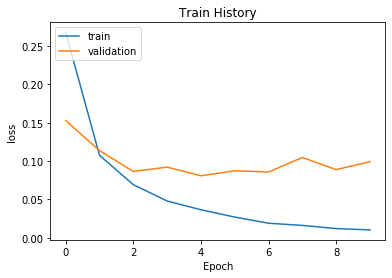

In [12]:
show_train_history(train_history, 'loss', 'val_loss')

## 評估模型準確率

In [13]:
scores = model.evaluate(x_test_image, y_test_label)
print('accuracy:', scores[1])

10000/10000 [==============================] - 0s 21us/step
accuracy: 0.9785
